In [14]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy.stats import norm, expon, lognorm
import matplotlib.pyplot as plt

# Copulas

### Mohsin Javed, June 13, 2019.

A copula is a distribution function $ C: \mathbb{R}^n \to [0, 1] $ such that 
all the marginals are standard uniform random variables.

By definition,

\begin{align*}
C(1, 1, \ldots, 1, u_j, 1, \ldots, 1) = u_j.
\end{align*}

Copulas allow us to use the dependence structure of one multivariate distribution for generating
samples of another multivariate distribution whose marginals can be specified arbitrarliy but 
whose dependence structure is inherited from the original multivariate distribution. 

Let's begin with a bivariate Gaussian distribution, with correlation $\rho$. A sample from 
such a distribution can easily be simulated. 

<IPython.core.display.Javascript object>


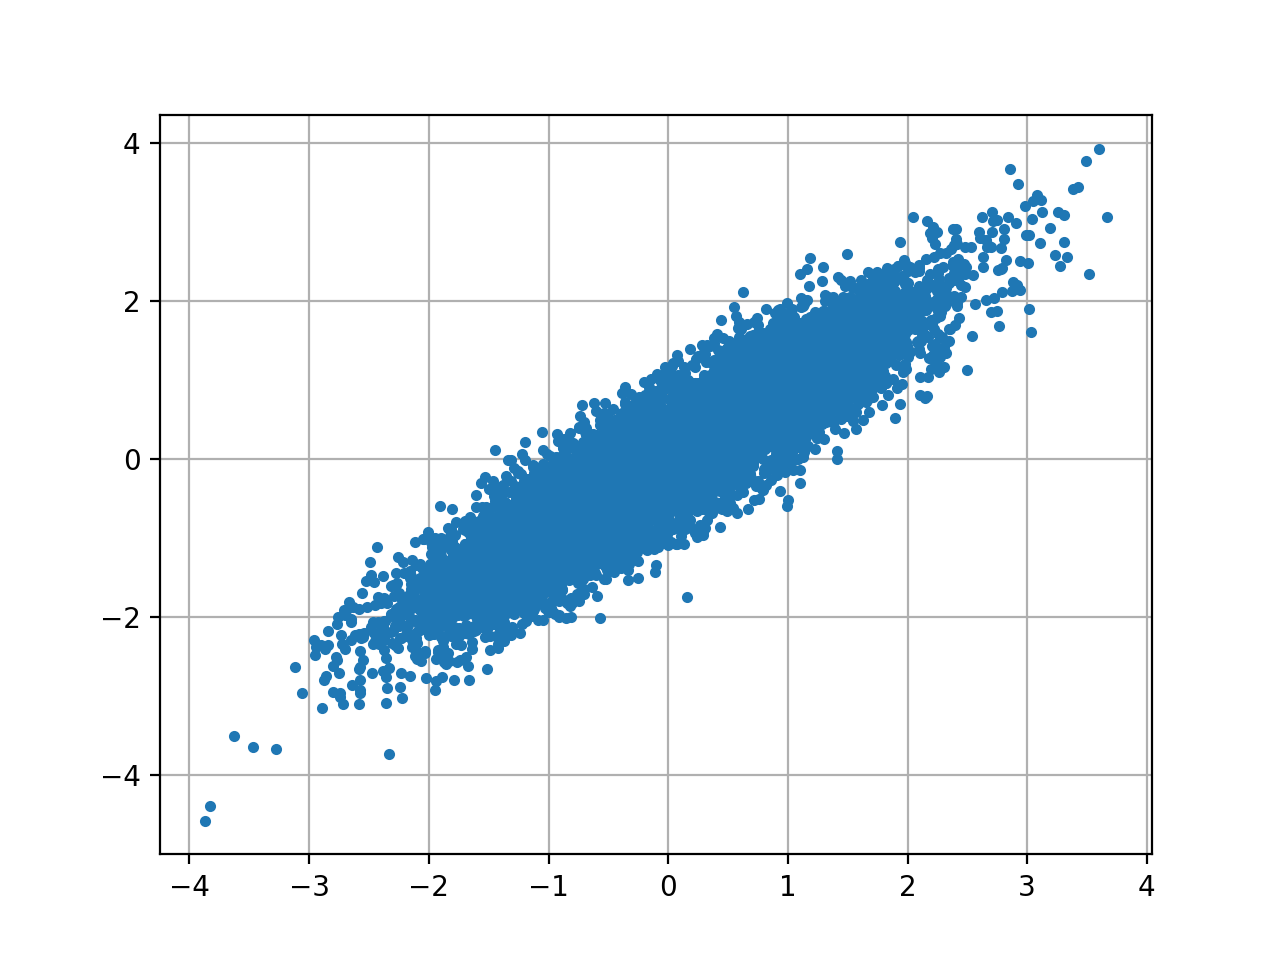

In [23]:
N = int(1e4)
rho = 0.9
s_1 = 1
s_2 = 1
Z = np.random.multivariate_normal([0, 0], [[s_1**2, rho], [rho, s_2**2]], N)
X = Z[:, 0]
Y = Z[:, 1]
plt.figure()
plt.plot(X, Y, '.')
plt.grid(True)

When we extract the marginals from the joint distribution, all informaton about the correlation i.e.,
how the two marginals dpended on each other is lost. 

<IPython.core.display.Javascript object>


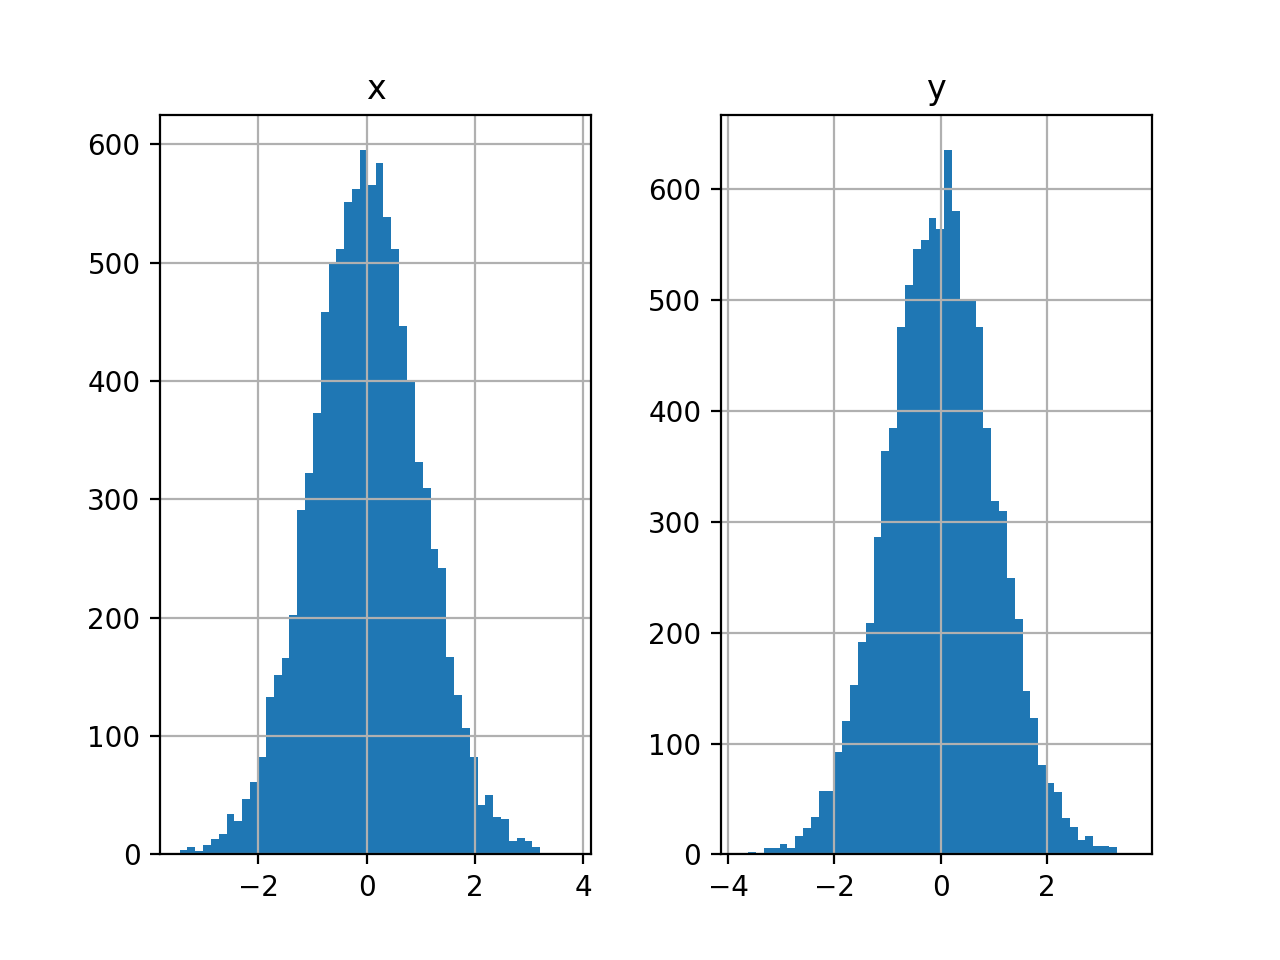

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109eaccf8>,
      dtype=object)

In [3]:
df_n = pd.DataFrame({'x': X, 'y': Y})
df_n.hist(bins=50, grid=True)

In [4]:
df_n['x'].corr(df_n['y'])

0.8997460725691865

Now we ask, how can we create two uniform random variables such that their dependence 
structure is the same as that of the dependence structure of the bivariate Gaussian distribution. Copulas answer this important question. 

From the probability integral transform, for any random variable $X \sim F$, the random variable $U = F(X)$ is 
uniform in $[0, 1]$. 

### Proof

\begin{align*}
P(Y \leq y ) &= P(F(X) \leq y )\\
&= P(X \leq F^{-1}(y))\\
&= F(F^{-1}(y))\\
&= y.
\end{align*}

We define the copula $C$ as,

\begin{align*}
C(U_1, U_2, \ldots, U_n ) = C(F_1(X_1), F_2(X_1), \ldots, F_n(X_1)).
\end{align*}

For the current example, since the marginals $F_1$ and $F_2$ are both normal, we can generate a 
sample with distribution $C$ as:

<IPython.core.display.Javascript object>


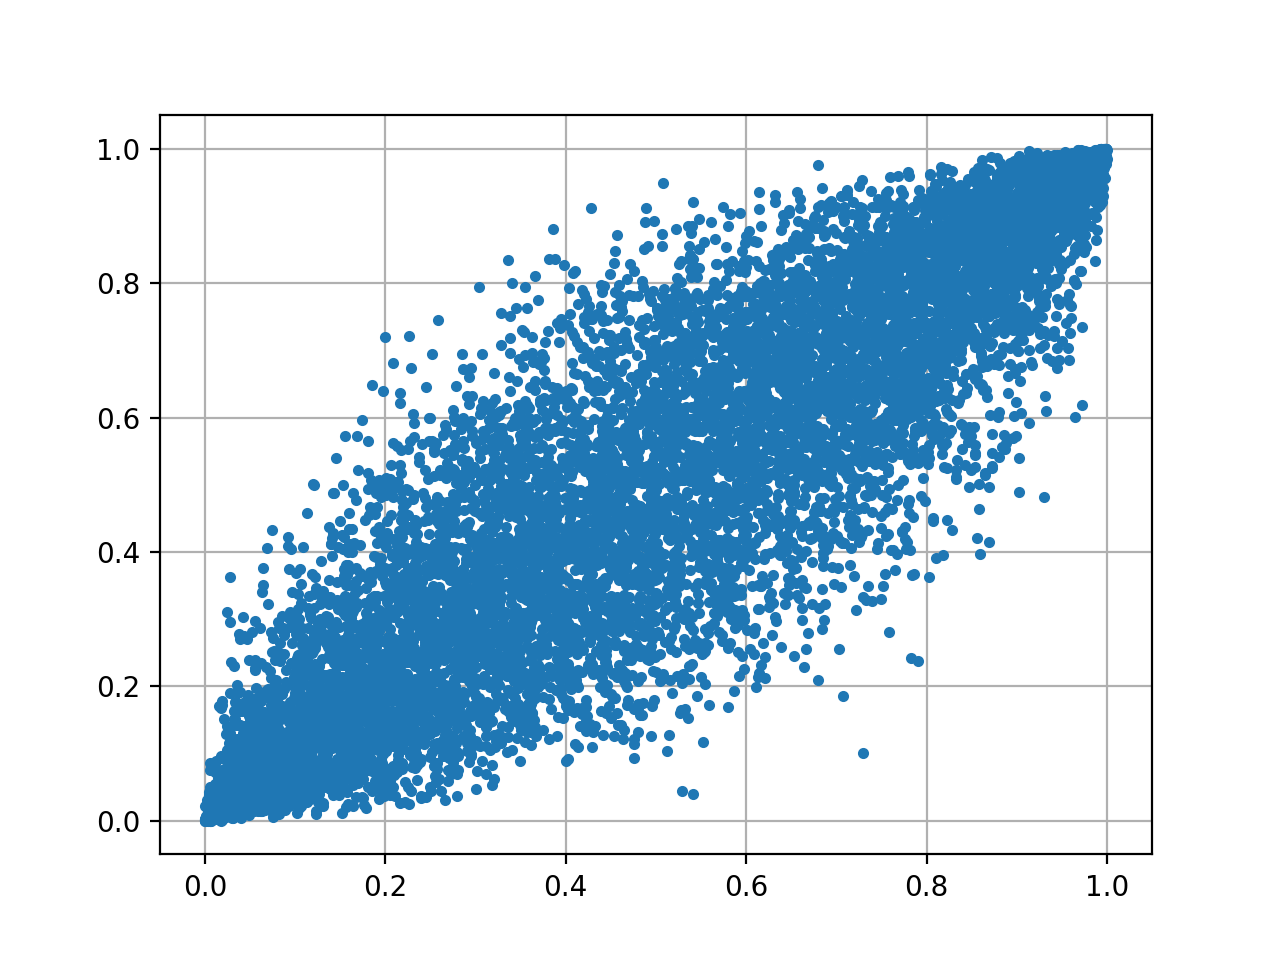

In [5]:
# Convert to uniform:
C = norm.cdf(Z)
u = C[:, 0]
v = C[:, 1]
plt.figure()
plt.plot(u, v, '.')
plt.grid(True)

The shape of the above plot says it all. We have transformed to the unit square, but the random sample we have
preserves the dependence structure of the bivariate normal from which the sample is obtained. 

Are the marginals uniform? That's the most exciting aspect to check.

<IPython.core.display.Javascript object>


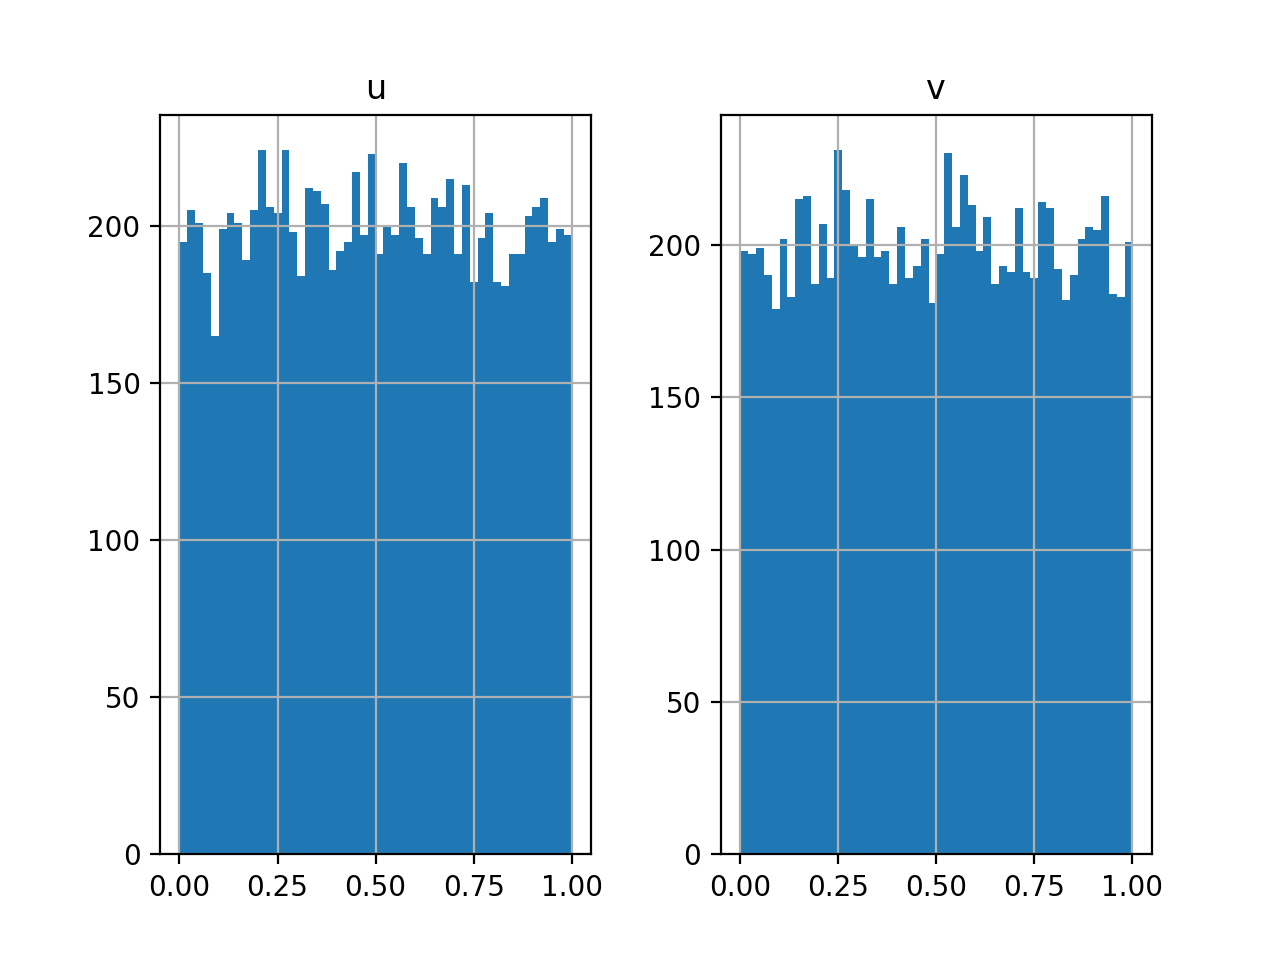

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109eacef0>,
      dtype=object)

In [6]:
df_c = pd.DataFrame({'u': u, 'v': v})
df_c.hist(bins=50, grid=True)

In [7]:
df_c['u'].corr(df_c['v'])

0.8892942068656685

Once we have the copula (the bivariate uniform sample in this case), we can generate a sample with
any new marginal specifications but mainting the same dependence structure. For example, we may want 
to generate a new sample from a joint distribution both of whose marginals are exponential.

To achive this, we simply transform the copula sample using inverse distribution functions of the new marginal distribution. 

<IPython.core.display.Javascript object>


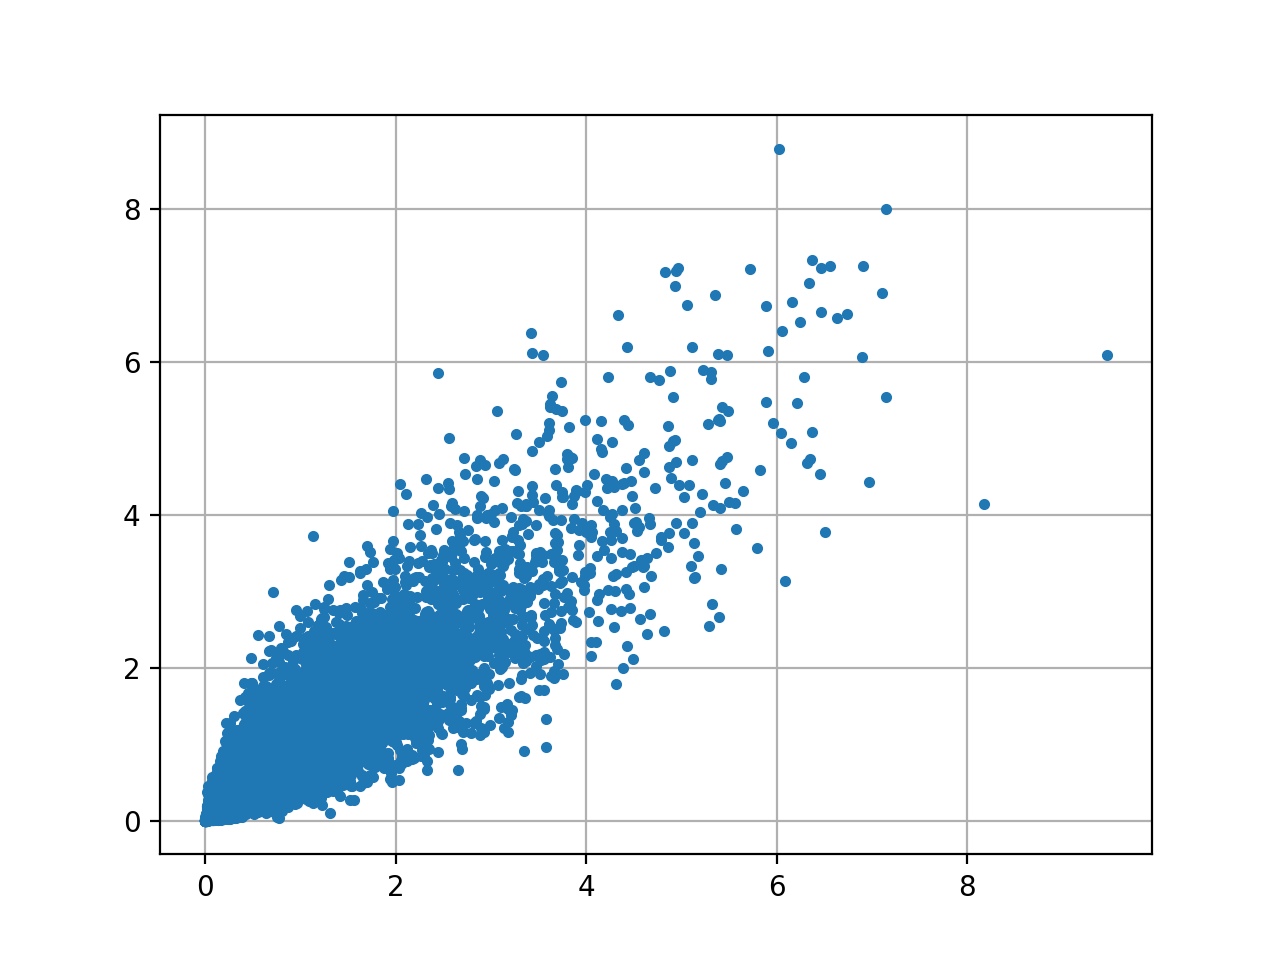

In [15]:
# ppf is the inverse cdf, i.e., the quantile transform
E = expon.ppf(C)
e_1 = E[:, 0]
e_2 = E[:, 1]
plt.figure()
plt.plot(e_1, e_2, '.')
plt.grid(True)

<IPython.core.display.Javascript object>


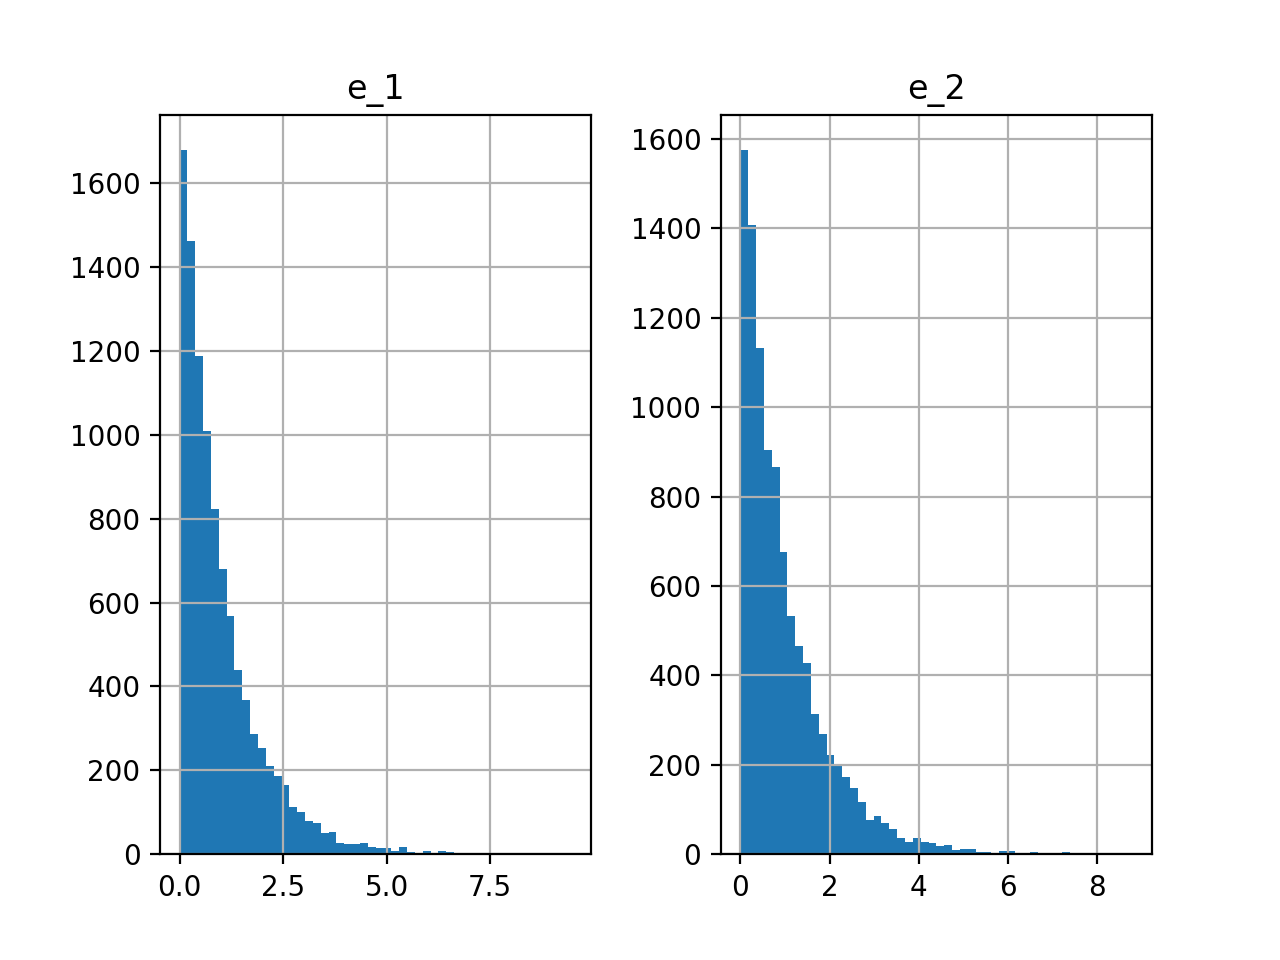

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d2cc908>,
      dtype=object)

In [9]:
df_e = pd.DataFrame({'e_1': e_1, 'e_2': e_2})
df_e.hist(bins=50, grid=True)

In [10]:
df_e['e_1'].corr(df_e['e_2'])

0.884471794678376

Suppose, now we want to generate a new sample from a joint distribution such that the marginals are lognormal and exponential. To achive this, we again transform the copula sample using inverse distribution functions of the new marginal distributions. 

<IPython.core.display.Javascript object>


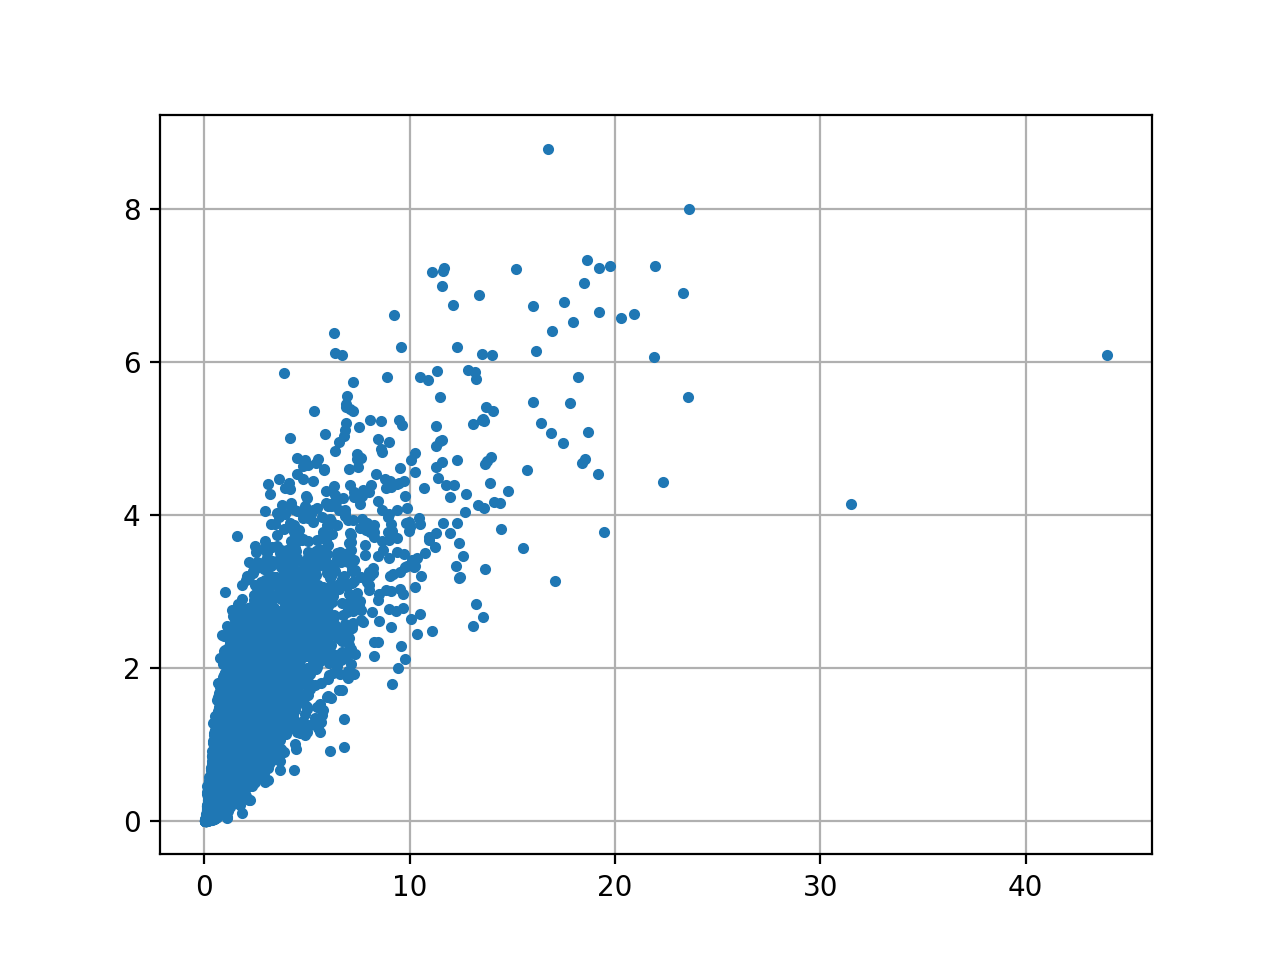

In [17]:
# ppf is the inverse cdf, i.e., the quantile transform
l = lognorm.ppf(C[:, 0], 1)
e = expon.ppf(C[:, 1])
plt.figure()
plt.plot(l, e, '.')
plt.grid(True)

<IPython.core.display.Javascript object>


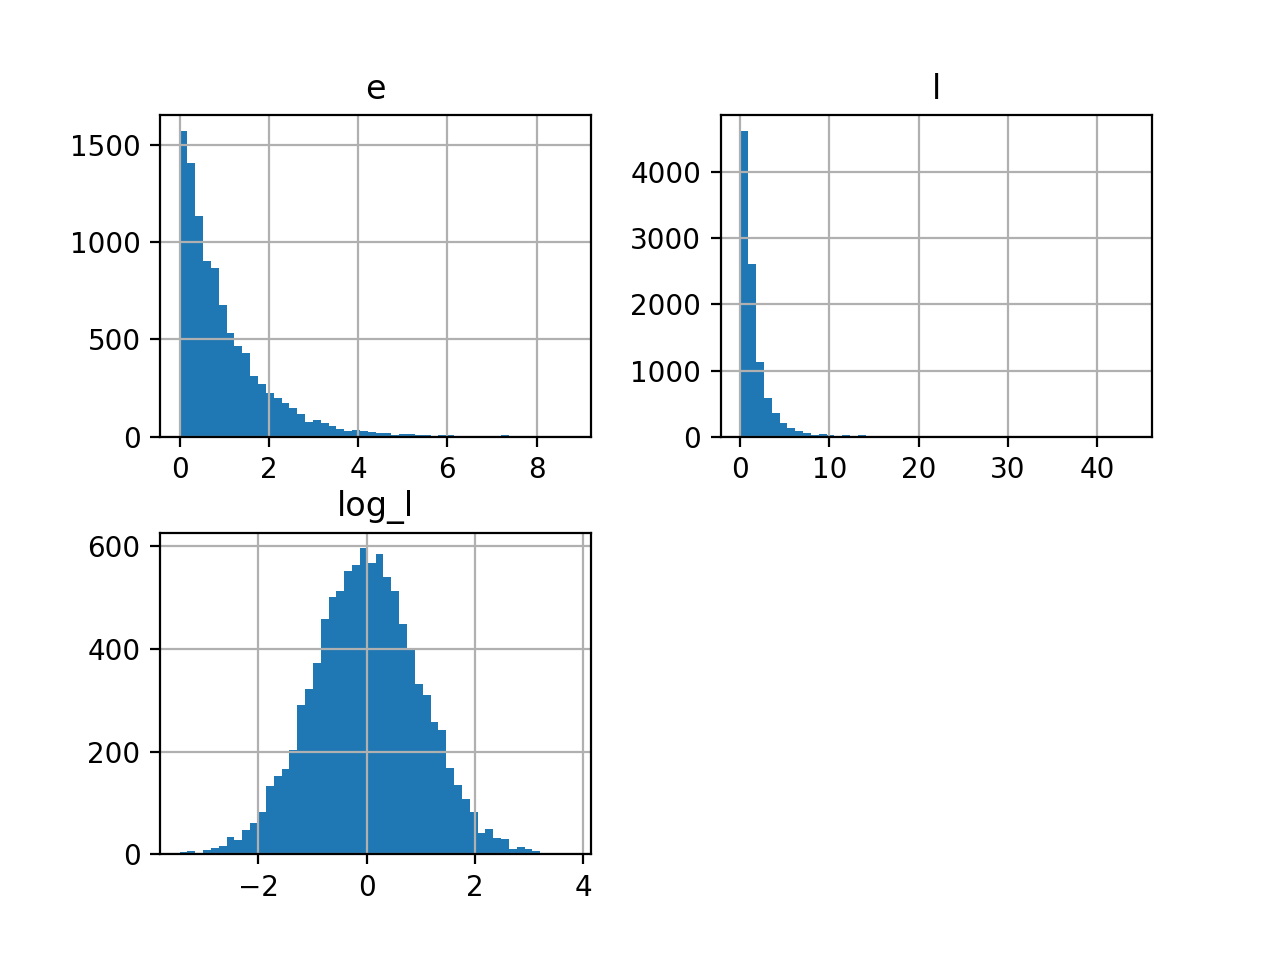

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd86898>,
      dtype=object)

In [21]:
df_l = pd.DataFrame({'l': l, 'log_l': np.log(l), 'e': e})
df_l.hist(bins=50, grid=True)

## Where do we use this?

* I am long ten credit default swaps on different names. 
* The joint crash probability of these names is best modelled via a correlated multivariate Gaussian.
* The probability of getting a payout from each CDS is exponential.

In this case, 

* We will first create a sample from the multivariate Gaussian. 
* Then form the copula sample using the probability integral transfrom on each component. 
* On the copula sample, apply the inverse of the exponential distribution function. 
* The final sample will have exponential marginals by construction and the same dependence structure as that of the multivariate Gaussian. 